<a href="https://colab.research.google.com/github/ToshikiNakamura0412/my_ipynb_vision/blob/master/preprosess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# デモ

feature num: 209


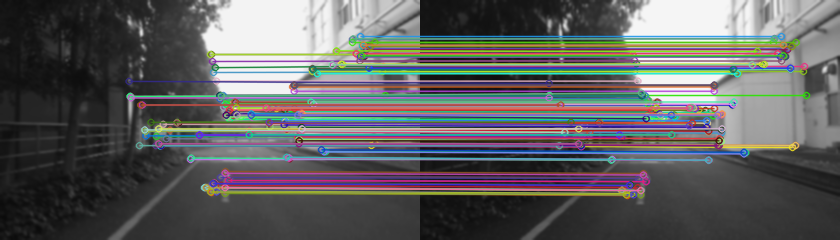

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# ===
# Preprocess
# ===
# Read as Gray
img1 = cv2.imread("image_0.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("image_1.png", cv2.IMREAD_GRAYSCALE)
# Normalization
img1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX)
img2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX)
# Resize
# img1 = cv2.resize(img1, (640, 480))
# img2 = cv2.resize(img2, (640, 480))
img1 = cv2.resize(img1, (420, 240))
img2 = cv2.resize(img2, (420, 240))
# GaussianBlur
img1 = cv2.GaussianBlur(img1, (5, 5), 0)
img2 = cv2.GaussianBlur(img2, (5, 5), 0)

# ===
# Feature Matching
# ===
feature = cv2.ORB_create()
# feature = cv2.AKAZE_create()
kp1, des1 = feature.detectAndCompute(img1, None)
kp2, des2 = feature.detectAndCompute(img2, None)

FLANN_INDEX_LSH = 6
index_params= dict(algorithm         = FLANN_INDEX_LSH,
                  table_number      = 6,
                  key_size          = 12,
                  multi_probe_level = 1)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k = 2)

# ===
# Ratio Test
# ===
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# ===
# RANSAC
# ===
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
F, mask = cv2.findFundamentalMat(src_pts, dst_pts, cv2.FM_RANSAC, 3, 0.99)
if mask is None:
  ransac_matches = good_matches
else:
  matches_mask = mask.ravel().tolist()
  ransac_matches = []
  for i in range(len(matches_mask)):
      if matches_mask[i] == 1:
          ransac_matches.append(good_matches[i])

# ===
# Visualization
# ===
img3 = cv2.drawMatches(img1, kp1, img2, kp2, ransac_matches, None, flags=2)
print(f"feature num: {len(ransac_matches)}")
cv2_imshow(img3)

# 前処理過程

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Logicool C920r
camera_matrix = np.array([[977.47514,   0.0    , 643.2183 ],
                          [  0.0    , 978.27553, 360.102  ],
                          [  0.0    ,   0.0    ,   1.0    ]])
dist_coeffs = np.array([0.021874, -0.102578, -0.000647, 0.002707, 0.000000])

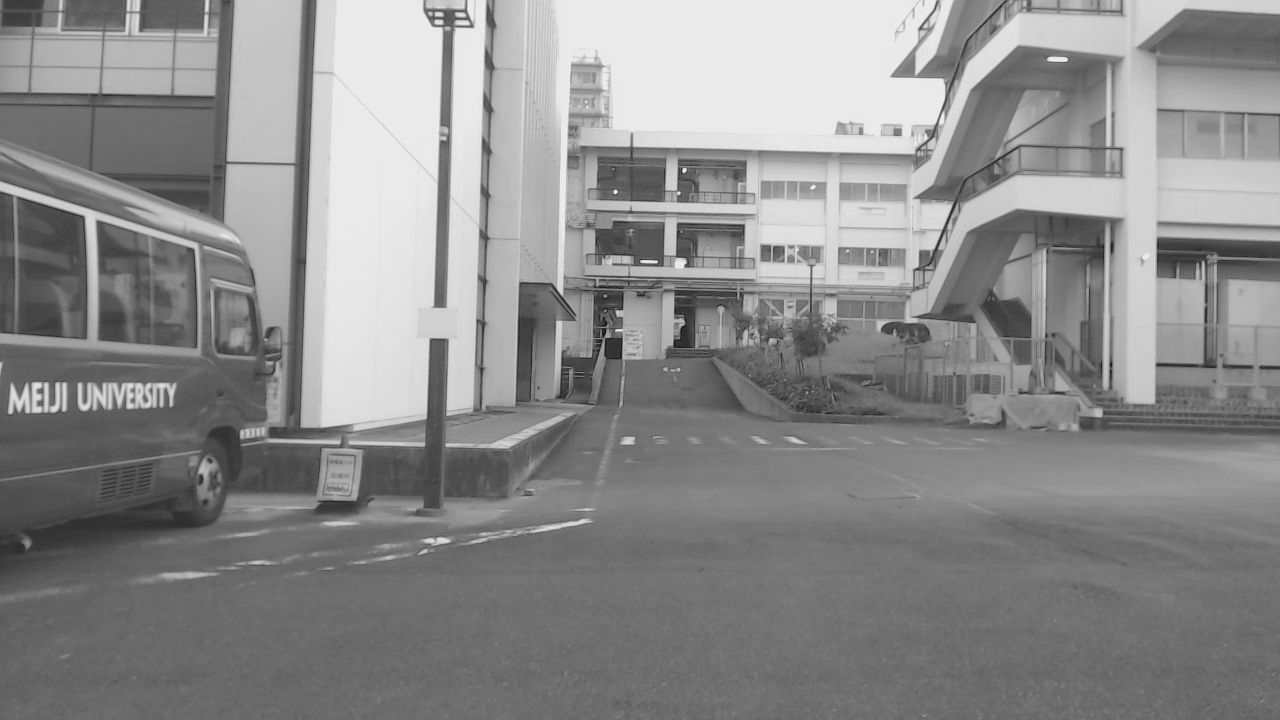

In [ ]:
# raw image
img = cv2.imread("image_0.png", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img1)

In [ ]:
h, w = img1.shape
print(h, w)

frame_width = 320
frame_height = 240

720 1280


In [ ]:
# ライセンスが適用される場合があるので注意↓
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, (w, h), 1, (frame_width, frame_height))
print(newcameramtx)
print(roi)

[[238.06312134   0.         161.62705844]
 [  0.         316.14049446 119.50655688]
 [  0.           0.           1.        ]]
(2, 3, 315, 232)


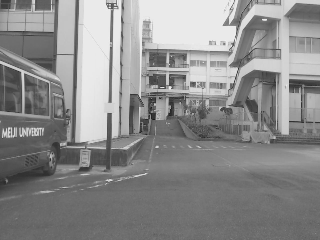

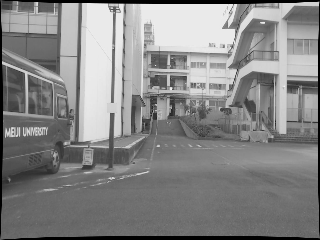

In [ ]:
map = cv2.initUndistortRectifyMap(camera_matrix, dist_coeffs, None, newcameramtx, (frame_width, frame_height), cv2.CV)
img_und = cv2.remap(img1, map[0], map[1], cv2.INTER_LINEAR)

img = cv2.resize(img, (frame_width, frame_height))
cv2_imshow(img)
cv2_imshow(img_und)

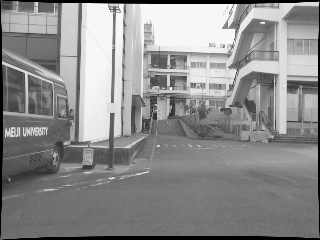

In [ ]:
img = img_und
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(img)

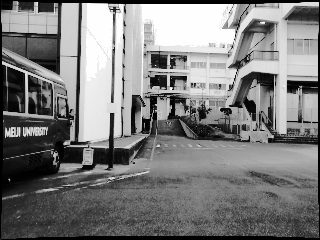

In [ ]:
img = cv2.equalizeHist(img)
cv2_imshow(img)

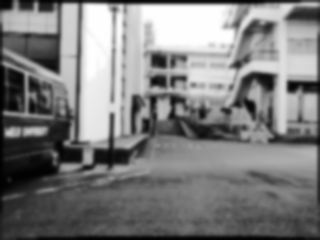

In [ ]:
img = cv2.GaussianBlur(img, (9, 9), 0)
cv2_imshow(img)